In [43]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
ls

Lab_random_forest.ipynb  numerical.csv
categorical.csv          target.csv


In [3]:
numerical = pd.read_csv('numerical.csv')
categorical = pd.read_csv('categorical.csv')
print("numerical shape: ", numerical.shape)
print("categorica shape: ", categorical.shape)
print(" ")
print("Numerica dataset: ")
display(numerical.head())
print("categorical dataset: ")
display(categorical.head())

numerical shape:  (95412, 315)
categorica shape:  (95412, 22)
 
Numerica dataset: 


,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,60.000000,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,1,46.000000,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1
2,1,61.611649,3,1,2,0,20,29,33,6,8,1,1,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3,3,0,497,546,2,1,78,22,93,7,18,36,76,65,30,86,14,7,2,5,11,17,3,17,60,18,0,1,0,0,1,6,18,50,0,4,36,49,51,14,5,4,2,24,11,2,3,6,0,2,9,44,0.0,281.0,518.0,251,292,292,340,11576,32,18,20,15,12,2,0,0,1,20,19,24,18,16,2,0,0,1,28,8,31,11,38,62,8,74,22,0,0,0,0,0,2,2,1,21,19,24,6,61,65,73,59,70,56,78,62,82,99,4,10,5,2,6,12,0,1,9,5,18,20,5,7,6,0,11,33,4,3,2,12,3,3

categorical dataset: 


,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,IL,36,H,F,3,L,E,C,T,2,89,1,37,12,92,8,94,2,95,12,89,11
1,CA,14,H,M,3,L,G,A,S,1,94,1,52,2,93,10,95,12,95,12,93,10
2,NC,43,U,M,3,L,E,C,R,2,90,1,0,2,91,11,92,7,95,12,90,1
3,CA,44,U,F,3,L,E,C,R,2,87,1,28,1,87,11,94,11,95,12,87,2
4,FL,16,H,F,3,L,F,A,S,2,86,1,20,1,93,10,96,1,96,1,79,3


In [4]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95412 entries, 0 to 95411
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   STATE         95412 non-null  object
 1   CLUSTER       95412 non-null  int64 
 2   HOMEOWNR      95412 non-null  object
 3   GENDER        95412 non-null  object
 4   DATASRCE      95412 non-null  int64 
 5   RFA_2R        95412 non-null  object
 6   RFA_2A        95412 non-null  object
 7   GEOCODE2      95412 non-null  object
 8   DOMAIN_A      95412 non-null  object
 9   DOMAIN_B      95412 non-null  int64 
 10  ODATEW_YR     95412 non-null  int64 
 11  ODATEW_MM     95412 non-null  int64 
 12  DOB_YR        95412 non-null  int64 
 13  DOB_MM        95412 non-null  int64 
 14  MINRDATE_YR   95412 non-null  int64 
 15  MINRDATE_MM   95412 non-null  int64 
 16  MAXRDATE_YR   95412 non-null  int64 
 17  MAXRDATE_MM   95412 non-null  int64 
 18  LASTDATE_YR   95412 non-null  int64 
 19  LAST

In [5]:
target = pd.read_csv('target.csv')
print(target.shape)
display(target.head())

(95412, 2)


,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0


In [6]:
df = pd.concat([numerical, categorical, target], axis = 1)
print(df.shape)
display(df.head(40))

(95412, 339)


,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_B,TARGET_D
0,0,60.000000,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39,IL,36,H,F,3,L,E,C,T,2,89,1,37,12,92,8,94,2,95,12,89,11,0,0.0
1,1,46.000000,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1,CA,14,H,M,3,L,G,A,S,1,94,1,52,2,93,10,95,12,95,12,93,10,0,0.0
2,1,61.611649,3,1,2,0,20,29,33,6,8,1,1,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3

In [7]:
df['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [8]:
df.isna().sum()

TCODE           0
AGE             0
INCOME          0
WEALTH1         0
HIT             0
               ..
LASTDATE_MM     0
FIRSTDATE_YR    0
FIRSTDATE_MM    0
TARGET_B        0
TARGET_D        0
Length: 339, dtype: int64

In [9]:
# Training data
y = df['TARGET_B']
X = df.drop(['TARGET_B'], axis = 1)

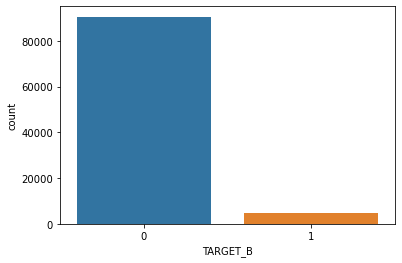

In [10]:
# check y
sns.countplot(x='TARGET_B', data =df);
plt.show()

In [11]:
# train/test split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [12]:
X_train_data = pd.DataFrame(X_train, columns=X.columns)
X_test_data = pd.DataFrame(X_test, columns=X.columns)

In [13]:
type(X_train_data)

pandas.core.frame.DataFrame

In [14]:
# define numerical and categorical variable
X_train_numerical = X_train_data.select_dtypes(include = np.number)
X_test_numerical = X_test_data.select_dtypes(include = np.number)
X_train_categorical = X_train_data.select_dtypes(include = object)
X_test_categorical = X_test_data.select_dtypes(include = object)


In [15]:
# Apply OneHotEncoder to train set variable

encoder = OneHotEncoder(drop='first').fit(X_train_categorical)

encoded_categorical_train = encoder.transform(X_train_categorical).toarray()
cols = encoder.get_feature_names_out(input_features=X_train_categorical.columns)
encoded_categorical_df = pd.DataFrame(encoded_categorical_train, columns=cols,index=X_train_categorical.index)



In [16]:
display(encoded_categorical_df.head())
print(encoded_categorical_df.shape)

,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,HOMEOWNR_U,GENDER_M,GENDER_other,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
48328,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
57444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
58452,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9912,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
40354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


(76329, 24)


In [17]:
# Apply OneHotEncoder to test set variable
encoded_categorical_test = encoder.transform(X_test_categorical).toarray()
cols = encoder.get_feature_names_out(input_features=X_test_categorical.columns)
encoded_categorical_df_test = pd.DataFrame(encoded_categorical_test,columns=cols,index=X_test_categorical.index)

In [18]:
display(encoded_categorical_df_test.head())
print(encoded_categorical_df_test.shape)

,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,HOMEOWNR_U,GENDER_M,GENDER_other,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
27670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
58454,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
83157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
50767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


(19083, 24)


In [19]:
# Concat DataFrame
X_train1 = pd.concat([X_train_numerical, encoded_categorical_df], axis = 1).sort_index()
#X_train1 = X_train1.reset_index(drop=True)
X_test1 = pd.concat([X_test_numerical, encoded_categorical_df_test], axis = 1)

In [20]:
X_train1.isna().sum()

TCODE         0
AGE           0
INCOME        0
WEALTH1       0
HIT           0
             ..
GEOCODE2_D    0
DOMAIN_A_R    0
DOMAIN_A_S    0
DOMAIN_A_T    0
DOMAIN_A_U    0
Length: 355, dtype: int64

In [21]:
# Apply StandardScaler method to train and test variables.
scaler = StandardScaler()

#On train set
scaler.fit(X_train1)
X_train_scaler = scaler.transform(X_train1) # it's a numpy array
X_train_scaler_df = pd.DataFrame(X_train_scaler, columns = X_train1.columns, index = X_train1.index)
display(X_train_scaler_df.head())

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,CLUSTER,DATASRCE,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_D,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,HOMEOWNR_U,GENDER_M,GENDER_other,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,-0.056299,-0.111227,0.508832,0.719286,-0.349855,-0.206020,0.745678,0.282933,-0.826301,0.717869,-0.499202,-0.508388,-0.629108,-0.394152,-0.411662,-0.419674,-1.233273,0.680662,0.970874,-0.214591,0.353797,0.339024,-0.386681,-0.225708,-0.413972,0.254951,-0.323348,-0.181832,-0.240397,-0.242587,-0.250071,-0.201128,-0.0577,0.515584,-0.231195,-0.102587,-0.452200,0.541595,0.735988,0.723517,0.560791,0.759885,0.883833,0.065506,-1.042356,0.570134,1.037883,-0.196744,-1.050087,-0.425429,0.685710,0.274322,0.075940,1.084443,-0.815637,-1.389281,0.440082,1.143122,0.494611,0.104871,0.081369,0.051668,-0.409620,-0.076310,0.435209,0.217495,0.241971,0.028999,0.223779,-0.816042,0.929420,-0.443314,0.256751,0.328487,1.077120,1.098379,-0.167867,-0.732110,-0.730385,-0.639404,0.883122,1.366808,-0.157939,-0.618834,-0.525154,-0.531070,-0.834418,0.751058,-0.739146,0.465338,-0.520410,-0.321052,0.181478,0.561214,0.692839,0.354222,0.148372,-0.103421,-0.353319,0.333725,-0.265655,-0.648315,-0.417242,-0.442598,0.034110,-0.054561,0.620323,-0.431101,-0.453297,-0.285225,-0.434705,-0.439620,-0.602112,-0.656474,-0.908463,-0.356381,-0.510988,0.713441,0.473951,0.695603,0.338999,-0.331945,-0.637218,-0.543101,-0.593569,0.364838,-0.565281,-0.617237,-0.531391,-0.842867,-1.069289,-1.297134,-0.145387,-1.232403,-0.076929,0.152581,-0.201540,-0.397146,-0.236478,-0.306421,-0.331253,-0.586034,0.765535,1.148858,0.626284,-0.096858,-0.786414,-0.660668,-0.483548,-0.190540,-0.875037,0.991694,0.984743,0.634096,-0.156177,-0.688219,-0.665559,-0.479315,-0.049374,0.087577,-0.339517,0.472951,-0.980454,-0.146032,0.201933,-0.903801,0.895297,-0.745585,-0.428577,-0.399640,-0.207443,-0.139945,-0.342622,-0.743879,0.203559,-0.203285,-0.279874,-0.809344,-1.162650,-0.617837,-0.863922,-0.624776,-0.671812,-0.435145,-0.386691,-0.648638,-0.127077,0.244601,0.940218,-1.402103,-0.718929,-0.620178,-1.343676,1.7

In [23]:
X_train_scaler_df.shape

(76329, 355)

In [24]:
#On test set
scaler.fit(X_test1)
X_test_scaler = scaler.transform(X_test1) # it's a numpy array
X_test_scaler_df = pd.DataFrame(X_test_scaler, columns = X_test1.columns, index = X_test1.index)
display(X_test_scaler_df.head())

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,CLUSTER,DATASRCE,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_D,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,HOMEOWNR_U,GENDER_M,GENDER_other,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
27670,-0.059184,1.269292,-1.843402,0.709956,-0.391929,-0.210879,0.225442,-1.027033,2.283107,-1.572379,-0.904060,-0.745652,0.755266,-0.484984,-0.517847,-0.482206,-1.243320,2.773851,-0.652813,0.513088,-0.357022,-1.543384,1.268952,-0.218719,-0.400505,1.138796,-0.300444,-0.169173,-0.248227,-0.245440,-0.248349,-0.193705,-0.061533,1.408587,-0.246670,-0.100045,-0.148637,0.184613,0.746489,1.239442,0.568213,0.772354,1.052439,-0.207158,2.024266,-1.653179,-0.857932,0.773483,-0.798700,-1.549399,-0.257541,0.037029,0.405363,1.568845,0.570398,3.229707,-1.432721,-2.203313,0.625936,1.417727,1.612418,1.376664,1.308534,-0.198725,-0.812273,-0.782332,-0.080089,0.281571,-1.631147,1.393449,2.425523,0.553539,-0.933045,-0.689376,-0.049063,-0.006809,1.336681,0.358672,0.063724,-0.104216,0.541883,0.918886,-0.151037,-0.945206,-0.966099,-0.960506,-0.841474,-0.866811,0.936242,-1.405381,1.867942,-0.464248,-0.672453,-0.841766,-1.776922,-1.158871,-0.506947,0.653772,1.128876,1.244101,0.987517,1.752090,1.310688,-0.200923,-0.834222,-1.691605,-0.184393,0.214958,1.016071,3.884938,-0.512573,-0.663136,-0.962368,-1.398026,-2.298248,-0.358706,0.018002,-0.830107,-0.656902,-0.660712,-0.853087,-0.329888,0.688576,-0.016941,-0.524123,1.002266,1.590110,0.168223,-0.543154,-0.906007,-1.186493,-1.604182,-0.968149,-1.233666,1.863834,-0.009179,-1.718466,-1.808095,-1.780940,-1.764432,-1.207702,3.878578,-0.236283,-2.521803,-1.512631,-1.643093,-0.954163,-0.662561,-0.498777,-0.406290,4.986313,-0.642386,-2.154741,-0.892200,-1.753286,-0.984132,-0.668535,-0.501590,-0.412853,1.104857,2.995569,-2.109293,4.366577,0.414063,-0.360985,-1.198154,-0.849190,0.454119,-0.431076,-0.403023,-0.204939,-0.133516,-0.348205,2.680920,-0.854384,-0.365353,-0.957749,-0.513465,-0.412659,0.718071,-0.406677,-2.115146,-1.569246,-2.419210,-1.927012,-2.774967,-1.725289,-2.357139,-1.445355,-1.397629,5.707381,-0.025797,

In [25]:
y.value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [26]:
y_train.value_counts()

0    72464
1     3865
Name: TARGET_B, dtype: int64

In [27]:
y_test.value_counts()

0    18105
1      978
Name: TARGET_B, dtype: int64

In [28]:
#downsampling 

#we need to temporarily concat X_train and y_train
trainset = pd.concat([X_train_scaler_df, y_train], axis=1).sort_index()
#trainset = trainset.reset_index(drop=True)

# Manual way to downsample category 0:
X_0 = trainset[trainset['TARGET_B']==0]
X_1 = trainset[trainset['TARGET_B']== 1].sample(len(X_0), replace = True)



In [29]:
X_0.shape

(72464, 356)

In [30]:
X_0.isna().sum()

TCODE         0
AGE           0
INCOME        0
WEALTH1       0
HIT           0
             ..
DOMAIN_A_R    0
DOMAIN_A_S    0
DOMAIN_A_T    0
DOMAIN_A_U    0
TARGET_B      0
Length: 356, dtype: int64

In [ ]:
X_1.shape

In [31]:
# concat X_0 and X_1 df
df_train = pd.concat([X_0, X_1], axis = 0).sort_index()
#df_train= df_train.reset_index(drop=True)
df_train.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,CLUSTER,DATASRCE,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_D,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,HOMEOWNR_U,GENDER_M,GENDER_other,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,TARGET_B
0,-0.056299,-0.111227,0.508832,0.719286,-0.349855,-0.206020,0.745678,0.282933,-0.826301,0.717869,-0.499202,-0.508388,-0.629108,-0.394152,-0.411662,-0.419674,-1.233273,0.680662,0.970874,-0.214591,0.353797,0.339024,-0.386681,-0.225708,-0.413972,0.254951,-0.323348,-0.181832,-0.240397,-0.242587,-0.250071,-0.201128,-0.0577,0.515584,-0.231195,-0.102587,-0.452200,0.541595,0.735988,0.723517,0.560791,0.759885,0.883833,0.065506,-1.042356,0.570134,1.037883,-0.196744,-1.050087,-0.425429,0.685710,0.274322,0.075940,1.084443,-0.815637,-1.389281,0.440082,1.143122,0.494611,0.104871,0.081369,0.051668,-0.409620,-0.076310,0.435209,0.217495,0.241971,0.028999,0.223779,-0.816042,0.929420,-0.443314,0.256751,0.328487,1.077120,1.098379,-0.167867,-0.732110,-0.730385,-0.639404,0.883122,1.366808,-0.157939,-0.618834,-0.525154,-0.531070,-0.834418,0.751058,-0.739146,0.465338,-0.520410,-0.321052,0.181478,0.561214,0.692839,0.354222,0.148372,-0.103421,-0.353319,0.333725,-0.265655,-0.648315,-0.417242,-0.442598,0.034110,-0.054561,0.620323,-0.431101,-0.453297,-0.285225,-0.434705,-0.439620,-0.602112,-0.656474,-0.908463,-0.356381,-0.510988,0.713441,0.473951,0.695603,0.338999,-0.331945,-0.637218,-0.543101,-0.593569,0.364838,-0.565281,-0.617237,-0.531391,-0.842867,-1.069289,-1.297134,-0.145387,-1.232403,-0.076929,0.152581,-0.201540,-0.397146,-0.236478,-0.306421,-0.331253,-0.586034,0.765535,1.148858,0.626284,-0.096858,-0.786414,-0.660668,-0.483548,-0.190540,-0.875037,0.991694,0.984743,0.634096,-0.156177,-0.688219,-0.665559,-0.479315,-0.049374,0.087577,-0.339517,0.472951,-0.980454,-0.146032,0.201933,-0.903801,0.895297,-0.745585,-0.428577,-0.399640,-0.207443,-0.139945,-0.342622,-0.743879,0.203559,-0.203285,-0.279874,-0.809344,-1.162650,-0.617837,-0.863922,-0.624776,-0.671812,-0.435145,-0.386691,-0.648638,-0.127077,0.244601,0.940218,-1.402103,-0.718929,-0.620178,-1.3

In [32]:
df_train.isna().sum()

TCODE         0
AGE           0
INCOME        0
WEALTH1       0
HIT           0
             ..
DOMAIN_A_R    0
DOMAIN_A_S    0
DOMAIN_A_T    0
DOMAIN_A_U    0
TARGET_B      0
Length: 356, dtype: int64

In [33]:
print(df_train.shape)
df_train['TARGET_B'].value_counts()

(144928, 356)


0    72464
1    72464
Name: TARGET_B, dtype: int64

In [34]:
# Now we can remove the column target d from the set of features
y_train = df_train['TARGET_B']
X_train = df_train.drop(['TARGET_B'], axis = 1)

In [ ]:
# Now we can remove the column target d from the set of features
y_test = df_train['TARGET_B']
X_train = df_train.drop(['TARGET_B'], axis = 1)

In [40]:
# Random Forest Classifier

clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8,
                             random_state = 42)
clf.fit(X_train, y_train)

print("The R2 for the Random Forest in the TRAIN set is {:.2f}".format(clf.score(X_train, y_train)))
print("The R2 for the Random Forest in the TEST  set is {:.2f}".format(clf.score(X_test_scaler_df, y_test)))

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test_scaler_df)

display(y_test.value_counts())


The R2 for the Random Forest in the TRAIN set is 1.00
The R2 for the Random Forest in the TEST  set is 1.00


0    18105
1      978
Name: TARGET_B, dtype: int64

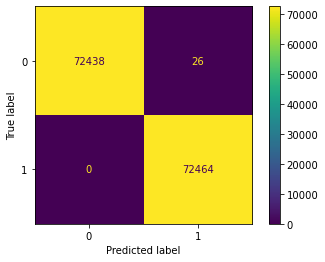

In [44]:
# Confision Matrix train
cm_train = confusion_matrix(y_train,y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=clf.classes_)
disp.plot()
plt.show()

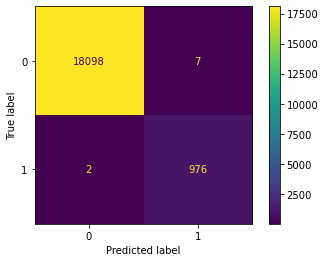

In [46]:
# Confision Matrix test
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=clf.classes_)
disp.plot()
plt.show()